In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.interpolate as interp
import scipy.stats as stats
import scipy.optimize as opt
import corner

%matplotlib inline

In [2]:
fig_width_pt = 246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
# Explicitly set fontsizes:
font_size = 10
tick_size = 8

def load_params():
    return {
              #'backend': 'ps',
              'axes.labelsize': font_size,
              'text.fontsize': font_size,
              'legend.fontsize': font_size,
              'xtick.labelsize': tick_size,
              'ytick.labelsize': tick_size,
              'text.usetex': True,
              'figure.figsize': fig_size,
              }

def set_params(params):
    plt.rcParams.update(params)

    
#plot_settings()

In [ ]:
#Plot that shows the possible functions
def power(z,f_8,alpha):
    return np.min( [np.max([f_8*((z+1.0)/9.0)**alpha,0.0]), 1.0])

def tanh(z,f_0,f_inf,z_half,dz):
    t = np.tanh((z-z_half)/dz)
    return 0.5*(f_inf-f_0)*t+0.5*(f_inf+f_0)

def knots(z, z_knots, f_knots, style):
    
    if z<3.0:
        return f_knots[0]
    elif z>12.0:
        return f_knots[-1]
    else:
    
        func = interp.interp1d(z_knots, f_knots, kind=style)
    
    return np.min([np.max([0.0,func(z)]), 1.0])

inch_size = 246.0/72.0
fig = plt.figure(figsize=(inch_size, inch_size*golden_mean))
ax = fig.add_subplot(111)

#fig_size =  [fig_width,fig_height*1.0]
#params = load_params()
#plt.rcParams.update(params)
#plot_settings()


    
    
z_pos = np.linspace(0,20,200)

#Knots
nknots=4
#z_knots = np.linspace(0,25,nknots)
z_knots = np.linspace(3,12,nknots)

f_knots = np.random.uniform(0,1,nknots) 

#print f_knots
f_knots = np.array([ 0.02235351,  0.21,  0.27,  0.35])

fesc = map(lambda x: knots(x,z_knots,f_knots,'cubic'),z_pos)
fesc2 = map(lambda x: knots(x,z_knots,f_knots,'linear'),z_pos)

plot_knots, = ax.plot(z_pos,fesc,'b',linewidth=2.0,linestyle='dotted')
#ax.plot(z_pos,fesc2,'b--',linewidth=1.5)

ax.plot(z_knots,f_knots,'ko',linewidth=2.0)


#Power law
fesc = map(lambda x: power(x,0.2,2.0), z_pos)
plot_power, = ax.plot(z_pos,fesc,'r',linewidth=2.0, linestyle='solid')

#Tanh
#fesc = map(lambda x: tanh(x,0.1,0.9,6.0,0.75), z_pos)
#fesc = map(lambda x: tanh(x,0.1,0.9,6.0,0.1), z_pos)
#plot_tanh, = ax.plot(z_pos,fesc,'k',linewidth=2.0, linestyle='dashed')

ax.errorbar([3.3],[0.1],yerr=0.125,uplims=[0.5],capsize=3,elinewidth=2.0,capthick=2.0)

#ax.set_ylim([-0.05,1.025])
ax.set_ylim([-0.05,0.425])

ax.set_xlim([0,13])


ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$f_\mathrm{esc}$')


#plt.setp(ax.get_xticklabels(), visible=False)


plt.legend([plot_knots, plot_power], 
           [r'$\mathrm{spline}$', r'$\mathrm{power}$'],
          loc='upper left',
          fontsize=8,
          frameon=False)

fig.tight_layout()

save=True
if save:
    direct='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct+'fesc_priors.pdf')


/Users/laynep/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


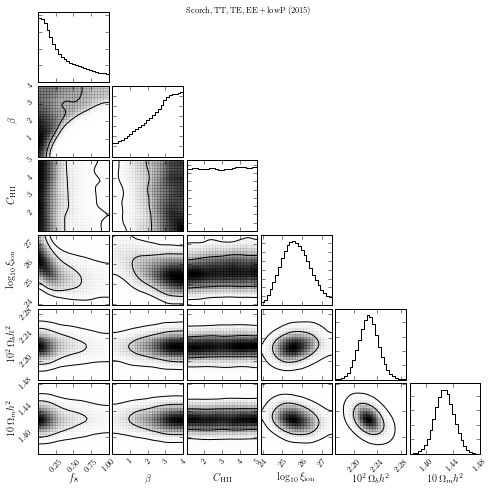

In [3]:
#Triangle plot for power law model

direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'
data = np.loadtxt(direct+'chain_power_TTTEEE_margcosmo.dat')

params = load_params()
plt.rcParams.update(params)

burnin = 20000 

def power(z,f_8,alpha):
    return f_8*((1.0+z)/9.0)**alpha

to_plot = data[burnin:,:]
to_plot2 = []

#xi_index = 4
for here in to_plot:
#    if here[xi_index]>24.0:# and here[3]<4 and here[3]>2 and here[4]<-9.5 and here[4]>-10.5 and here[5]>-0.36 and here[5]<-0.34 :
        #here[-1]=10.0**here[-1]
    if power(z=3.0,f_8=here[1],alpha=here[2])<0.10:

        here2 = here
        #print here2, here2[1], here2[-1]
        #sys.exit()
#        here2[1]=here2[1]*1e1**here2[xi_index]*1e-25
        here2[-2] = here2[-2]*1e2
        here2[-1] = here2[-1]*1e1

    
        #to_plot2.append(here2[:-1])
        to_plot2.append(here2)
to_plot = np.array(to_plot2)
#to_plot = to_plot[0::2,:]

to_plot = to_plot[:, [1,2,3,4,5,6]]

inch_size = 246.0*2.0/72.0

params = load_params()

fig = plt.figure(figsize=(inch_size, inch_size))
#ax = fig.add_subplot(111)
#plot_settings(size=246.0*2.0)

corner.corner(to_plot, 
                       figure=fig,
                       labels=[r'$  f_8 $', r'$\beta$', r'$C_\mathrm{HII}$', 
                               r'$\log_{10} \xi_{\rm ion}$',
                               r'$10^2 \, \Omega_b h^2$',r'$10 \, \Omega_m h^2$'],
                       plot_datapoints=False,
                       levels=[0.68,0.95],
                       color=u'k',
                       smooth=1.75,
                       bins=25, 
                       linewidth=2.0,
                       fontsize=13,
                       max_n_ticks=4,
                       figsize = (inch_size, inch_size),
                       cmap='Blues',
                       smooth1d=1.25)

fig = plt.gcf()
fig.set_size_inches(inch_size, inch_size)
#fig.savefig('test2png.png', dpi=100)

fig.suptitle(r'${\rm Scorch, TT,TE,EE+lowP\ (2015)}$',fontsize=8)


save=True
if save:
    direct='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct+'corner_power_TTTEEE_Scorch.pdf')

In [ ]:
#Quantiles of everything
direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'

#do_these = ['power','margcosmo','ngamma','fesc']
do_these = ['fesc']

################
if 'margcosmo' in do_these:
    print "------------"
    print "DOING MARGCOSMO"
    print "------------"
    burnin = 20000 
    fname = 'chain_power_TTTEEE_margcosmo.dat'
    data = np.loadtxt(direct+fname)

    def max_1d(data,bins):
        hist = np.histogram(data,bins=bins)
        loc = np.argmax(hist[0])
        try:
            maximum = (hist[1][loc+1]+hist[1][loc])/2.0
        except:
            maximum = hist[1][loc]
        return maximum

    print "------"
    print fname
    print "f_8 68% from left:", np.percentile(data[-burnin:,1],68)
    print "Data max-like (degenerate):", data[np.argmax(data[-burnin:,0])]
    print "f_8 max 1D post:", max_1d(data[-burnin:,1],40)
    print "alpha 68% from right:", np.percentile(data[-burnin:,2],100-68)
    print "xiion 16% from left, 50%, 16% from right:", np.percentile(data[-burnin:,4],16),np.percentile(data[-burnin:,4],50),np.percentile(data[-burnin:,4],84)

################
if 'power' in do_these:
    print "------------"
    print "DOING POWER"
    print "------------"
    burnin = 150000 

    name_list_Scorch = ['chain_power_TTTEEE_margcosmo.dat',
                 'chain_power_lensing_BAO_tauonly_xiion.dat',
                 'chain_power_planck16_Scorch_xiion.dat'
                ]
    name_list_B15 = ['chain_power_TTTEEE_Bouwens_tauonly_xiion_dMSFdz.dat',
                 'chain_power_lensing_BAO_Bouwens_tauonly_xiion_dMSFdz.dat',
                 'chain_power_planck16_Bouwens_xiion_dMSFdz.dat'
                ]
    for name in name_list_Scorch+name_list_B15:
        data = np.loadtxt(direct+name)
        print "------"
        print name
        print "f_8 68% from left:", np.percentile(data[-burnin:,1],68)
        print "alpha 68% from right:", np.percentile(data[-burnin:,2],100-68)
        print "xiion 16% , 50%, 84%:", np.percentile(data[-burnin:,4],16),np.percentile(data[-burnin:,4],50), np.percentile(data[-burnin:,4],84)
        if 'dMSFdz' in name:
            print "dMSF 68% from left:",np.percentile(data[-burnin:,5],68)

    name_list_B15_fixed = ['chain_power_TTTEEE_Bouwens_tauonly_xiion.dat',
                 'chain_power_lensing_BAO_Bouwens_tauonly_xiion.dat',
                 'chain_power_planck16_Bouwens_xiion.dat'
                ]
    for name in name_list_B15_fixed:
        data = np.loadtxt(direct+name)
        print "------"
        print name
        print "f8 68% from left%:", np.percentile(data[-burnin:,1],68)
        print "alpha 68% from left:", np.percentile(data[-burnin:,2],68)


################
if 'ngamma' in do_these:
    print "------------"
    print "DOING NGAMMA"
    print "------------"

    burnin = 150000 

    name_list = ['chain_ngamma_TTTEEE_tauonly2.dat',
                'chain_ngamma_lensing_BAO_tauonly2.dat',
                'chain_ngamma_planck16.dat']

    def load_data(fname):
        data1 = 10.0**(np.loadtxt(fname,skiprows=burnin)[:,1:6])/n_H/sec_to_Gyr
        mean=np.array([np.median(np.log10(colmn)) for colmn in data1.T ])
        std=np.array([np.sqrt(np.var(np.log10(colmn))) for colmn in data1.T ])
        return mean, std

    for name in name_list:
        #data = np.loadtxt(direct+name)
        print "------"
        print name
        print "ngamma mean, std:", load_data(direct+name)
        
################
if 'fesc' in do_these:
    print "------------"
    print "DOING FESC"
    print "------------"

    burnin = 150000 

    name_list = ['chain_polint_TTTEEE_tauonly_xiion.dat',
                'chain_polint_lensing_BAO_tauonly_xiion.dat',
                'chain_polint_planck16_Scorch_xiion.dat',
                'chain_polint_TTTEEE_Bouwens_tauonly_xiion_dMSFdz.dat',
                'chain_polint_lensing_BAO_Bouwens_tauonly_xiion_dMSFdz.dat',
                'chain_polint_planck16_Bouwens_xiion_dMSFdz.dat',
                'chain_polint_TTTEEE_Bouwens_tauonly_xiion.dat',
                'chain_polint_lensing_BAO_Bouwens_tauonly_xiion.dat',
                'chain_polint_planck16_Bouwens_xiion.dat'
                ]

    for name in name_list:
        data = np.loadtxt(direct+name)
        print "------"
        print name
        print "fesc mean, std:", map(np.mean,data[:,1:6].T),map(np.std,data[:,1:5].T)
        med = np.median(data[:,6])
        print "logxiion median, low, up at 68%:", med,np.percentile(data[:,6],16)-med,np.percentile(data[:,6],84)-med

        

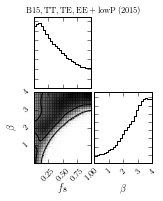

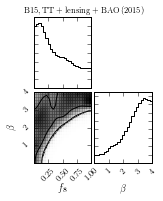

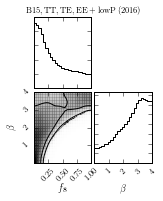

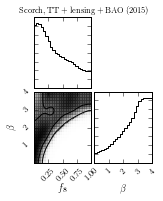

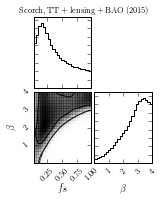

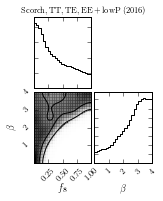

In [4]:
#Reduced triangle plots for alt power law model

direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'
name_list = ['chain_power_TTTEEE_Bouwens_tauonly_xiion_dMSFdz.dat',
             'chain_power_lensing_BAO_Bouwens_tauonly_xiion_dMSFdz.dat',
             'chain_power_planck16_Bouwens_xiion_dMSFdz.dat',
             'chain_power_TTTEEE_margcosmo.dat',
             'chain_power_lensing_BAO_tauonly.dat',
             'chain_power_planck16_Scorch_xiion.dat'
            ]

burnin= 100000

def power(z,f_8,alpha):
    return f_8*((1.0+z)/9.0)**alpha

for name in name_list:
    data = np.loadtxt(direct+name)
    
    params = load_params()
    plt.rcParams.update(params)

    to_plot = data[-burnin:,:]
    to_plot2 = []
    xi_index = 4
    for here in to_plot:

#       if here[xi_index]>24.0:# and here[3]<4 and here[3]>2 and here[4]<-9.5 and here[4]>-10.5 and here[5]>-0.36 and here[5]<-0.34 :
            #here[-1]=10.0**here[-1]
        if power(z=3.0,f_8=here[1],alpha=here[2])<0.10:

            here2 = here
    
            to_plot2.append(here2)
        
    to_plot = np.array(to_plot2)

    to_plot = to_plot[:, [1,2]]

    inch_size = 246.0*2/72.0/3.1

    params = load_params()

    fig = plt.figure(figsize=(inch_size, inch_size))
    #ax = fig.add_subplot(311)
    #plot_settings(size=246.0*2.0)
    

    corner.corner(to_plot, 
                           figure=fig,
                           labels=[r'$f_8  $', r'$\beta$', r'$C_\mathrm{HII}$', 
                                   r'$\Omega_b h^2$',r'$\Omega_m h^2$'],
                           levels=[0.68,0.95],
                           #range = ranger,
                           color=u'k',
                           smooth=1.75,
                           bins=25, 
                           linewidth=2.0,
                           max_n_ticks=4,
                           #fontsize=10,
                           smooth1d=1.25)

    fig = plt.gcf()
    fig.set_size_inches(inch_size, inch_size*2*golden_mean)
      
    
    if 'Bouwens' in name:
        if 'BAO' in name:
            fig.suptitle(r'${\rm B15, TT+lensing+BAO\ (2015)}$',fontsize=8)
        elif 'planck' in name:
            fig.suptitle(r'${\rm B15, TT,TE,EE+lowP\ (2016)}$',fontsize=8)
        else:
            fig.suptitle(r'${\rm B15, TT,TE,EE+lowP\ (2015)}$',fontsize=8)

    else:
        if 'planck' in name:
            fig.suptitle(r'${\rm Scorch, TT,TE,EE+lowP\ (2016)}$',fontsize=8)
        else:

            fig.suptitle(r'${\rm Scorch, TT+lensing+BAO\ (2015)}$',fontsize=8)


    save=True
    if save:
        direct2='/Users/laynep/work/papers/reionization/plots/'
        plt.savefig(direct2+name[:-4] +'.pdf')

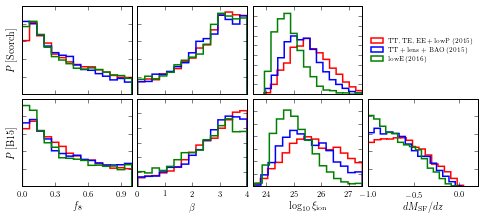

In [5]:
#1D comparison plots with power law
import scipy.stats as stats


direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'
name_list_Scorch = ['chain_power_TTTEEE_margcosmo.dat',
             'chain_power_lensing_BAO_tauonly_xiion.dat',
             'chain_power_planck16_Scorch_xiion.dat'
            ]
name_list_B15 = ['chain_power_TTTEEE_Bouwens_tauonly_xiion_dMSFdz.dat',
             'chain_power_lensing_BAO_Bouwens_tauonly_xiion_dMSFdz.dat',
             'chain_power_planck16_Bouwens_xiion_dMSFdz.dat'
            ]

colors = ['r','b','g']
labels = [r'$\mathrm{TT,TE,EE+lowP\ (2015)}$',r'$\mathrm{TT+lens+BAO\ (2015)}$',r'$\mathrm{lowE\ (2016)}$']


inch_size = 2*246.0/72.0
fig = plt.figure(figsize=(inch_size, 0.75*inch_size*golden_mean))
ax1 = fig.add_subplot(241)
ax2 = fig.add_subplot(242)
ax3 = fig.add_subplot(243)
ax4 = fig.add_subplot(245)
ax5 = fig.add_subplot(246)
ax6 = fig.add_subplot(247)
ax7 = fig.add_subplot(248)

params = load_params()
plt.rcParams.update(params)

burnin= 50000

def power(z,f_8,alpha):
    return f_8*((1.0+z)/9.0)**alpha

def kde(data,xvals,cov=0.25):
    density = stats.gaussian_kde(data)
    density.covariance_factor = lambda : cov
    density._compute_covariance()
    yvals = density(xvals)
    return yvals

plots=[]
counter=0
for name, color in zip(name_list_Scorch,colors):
    data = np.loadtxt(direct+name)
    
    nbins = 15
    plot1 = ax1.hist(data[-burnin:,1],bins=nbins,histtype='step',linewidth=1.5,color=color,normed=True,
                    label = labels[counter])
    plot2 = ax2.hist(data[-burnin:,2],bins=nbins,histtype='step',linewidth=1.5,color=color,normed=True)
    plot3 = ax3.hist(data[-burnin:,4],bins=nbins,histtype='step',linewidth=1.5,color=color,normed=True)
    
    plots.append(plot1)
    counter+=1
    
    #xvals = np.linspace(0,1,100)
    #ax1.plot(xvals,kde(data[-burnin:,1],xvals,cov=0.2))
    #xvals = np.linspace(0,4,100)
    #ax2.plot(xvals,kde(data[-burnin:,2],xvals,cov=0.2))
    #xvals = np.linspace(23.5,27.5,100)
    #ax3.plot(xvals,kde(data[-burnin:,4],xvals,cov=0.2))
    
    #hist = np.histogram(data[-burnin:,1],bins=nbins)
    #ax1.plot(hist[1][:-1],hist[0])

for name, color in zip(name_list_B15,colors):
    data = np.loadtxt(direct+name)
    
    nbins = 15 
    ax4.hist(data[-burnin:,1],bins=nbins,histtype='step',linewidth=1.5,color=color,normed=True)
    ax5.hist(data[-burnin:,2],bins=nbins,histtype='step',linewidth=1.5,color=color,normed=True)
    ax6.hist(data[-burnin:,4],bins=nbins,histtype='step',linewidth=1.5,color=color,normed=True)
    ax7.hist(data[-burnin:,5],bins=nbins,histtype='step',linewidth=1.5,color=color,normed=True)
    
    #xvals = np.linspace(0,1,100)
    #ax4.plot(xvals,kde(data[-burnin:,1],xvals,cov=0.2))
    #xvals = np.linspace(0,4,100)
    #ax5.plot(xvals,kde(data[-burnin:,2],xvals,cov=0.2))
    #xvals = np.linspace(23.5,27.5,100)
    #ax6.plot(xvals,kde(data[-burnin:,4],xvals,cov=0.2))
    #xvals = np.linspace(-1,0.2,100)
    #ax7.plot(xvals,kde(data[-burnin:,5],xvals,cov=0.2))
    
    
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), visible=False)
plt.setp(ax7.get_yticklabels(), visible=False)

ax4.set_xlabel(r'$f_8$')
ax5.set_xlabel(r'$\beta$')
ax6.set_xlabel(r'$\log_{10} \xi_\mathrm{ion}$')
ax7.set_xlabel(r'$dM_\mathrm{SF}/dz$')

ax1.set_ylabel(r'$P \; [\mathrm{Scorch}]$')
ax4.set_ylabel(r'$P \; [\mathrm{B15}]$')

ax1.set_xticks([0,0.3,0.6,0.9])
ax4.set_xticks([0,0.3,0.6,0.9])

ax2.set_xticks([0,1,2,3,4])
ax5.set_xticks([0,1,2,3,4])

ax3.set_xticks([24,25,26,27])
ax6.set_xticks([24,25,26,27])

ax7.set_xticks([-1,-0.5,0])

plt.tight_layout()

plt.subplots_adjust(hspace=0.05,wspace=0.05)


ax1.legend(loc='upper right',
          fontsize=6,
          ncol=1,
           numpoints=1,
          frameon=False,
          bbox_to_anchor=(1.0, 1.75), bbox_transform=ax7.transAxes)

save=True
if save:
    direct2='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct2+'power_hist.pdf')

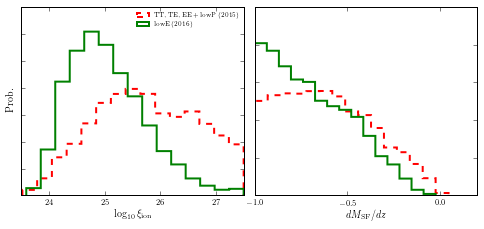

In [29]:
#Reduced histogram plot for reionization talks

direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'

name_list_B15 = ['chain_power_TTTEEE_Bouwens_tauonly_xiion_dMSFdz.dat',
             #'chain_power_lensing_BAO_Bouwens_tauonly_xiion_dMSFdz.dat',
             'chain_power_planck16_Bouwens_xiion_dMSFdz.dat'
            ]

colors = ['r','g']
styles=['--','-']
labels = [r'$\mathrm{TT,TE,EE+lowP\ (2015)}$',r'$\mathrm{lowE\ (2016)}$']


inch_size = 2*246.0/72.0
fig = plt.figure(figsize=(inch_size, 0.75*inch_size*golden_mean))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


params = load_params()
plt.rcParams.update(params)

burnin= 50000

plotter=[]
counter=0
for name, color, style in zip(name_list_B15,colors,styles):

    data = np.loadtxt(direct+name)
    
    nbins = 15 
    _, _, plot1 = ax1.hist(data[-burnin:,4],bins=nbins,histtype='step',linewidth=2.0,
                           color=color,normed=True,linestyle=style,
                          label=labels[counter])
    ax2.hist(data[-burnin:,5],bins=nbins,histtype='step',linewidth=2.0,color=color,normed=True,linestyle=style)
    
    plotter.append(plot1)
    counter += 1
    

ax1.set_xticks([24,25,26,27])
ax2.set_xticks([-1,-0.5,0])

plt.tight_layout()

plt.subplots_adjust(hspace=0.05,wspace=0.05, bottom=0.11)

ax1.legend(loc='upper right',
          fontsize=6,
          ncol=1,
           numpoints=1,
          frameon=False)
          #bbox_to_anchor=(1.0, 1.75), bbox_transform=ax7.transAxes)

plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

ax1.set_xlabel(r'$\log_{10} \xi_\mathrm{ion}$')
ax2.set_xlabel(r'$dM_\mathrm{SF}/dz$')

ax1.set_ylabel(r'$\mathrm{Prob.}$')

save=True
if save:
    direct2='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct2+'power_hist_REDUCED.pdf')

In [27]:
plt.subplots_adjust?

In [ ]:
#Error bar plot for knotted sky f_esc
#import waterfill_errors as err

direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'
data_list = ['chain_polint_TTTEEE_tauonly.dat','chain_polint_TTTEEE_Bouwens_tauonly_dMSFdz.dat', 
             #'chain_polint_lensing_BAO_tauonly.dat',  'chain_polint_lensing_BAO_Bouwens_tauonly.dat']
             'chain_polint_planck16_Scorch.dat','chain_polint_planck16_Bouwens_dMSFdz.dat']


inch_size = 2*246.0/72.0
fig = plt.figure(figsize=(inch_size, 0.67*inch_size*golden_mean))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
#ax3 = fig.add_subplot(223)
#ax4 = fig.add_subplot(224)

ax_list=[ax1,ax2,ax1,ax2]

params = load_params()
plt.rcParams.update(params)

def knots(z, z_knots, f_knots, style, xi_ion=False):
    
    if z<3.0:
        fesc = f_knots[0]
    elif z>12.0:
        fesc = f_knots[-1]
    else:
    
        func = interp.interp1d(z_knots, f_knots, kind=style)
        fesc = np.min([np.max([0.0,func(z)]), 1.0])
        #fesc = np.max([0.0,func(z)])
    
    if xi_ion==False:
        return fesc
    else:
        return (10.0**xi_ion)*fesc

burnin=80000

for name, ax in zip(data_list,ax_list):
    print name
    data = np.loadtxt(direct+name)
    data = data[burnin:]
    
    print "min,max", np.min(data[:,1]),np.max(data[:,1])
    
    
    #data = np.array([row for row in data if row[1]<row[2] <row[3]<row[4]])
    
    #Change to f_esc*\xi_ion
    #for ii in xrange(len(data)):
    #    data[ii,1:5]=data[ii,1:5]*(10.0**data[ii,-1])

    z_knots = np.linspace(3,12,4)
    nknots = len(z_knots)
    f_knots = data[:,1:nknots+1]

    z_vals = np.linspace(3,12,200)
    
    #Mean +/- 1 sig for f_6 and f_12
    mean_z = [np.mean(dat) for dat in f_knots.T]
    err_z = [np.sqrt(np.var(dat))for dat in f_knots.T]
    
    #Change f_9 to lower limit at 68% CI assuming linear PDF
    #mean_z[2]=np.sqrt(1.0-0.68)
    #err_z[2] = 1.0-mean_z[2]
    
    #Change f_3 to upper limit at 68% CI assuming linear PDF
    #mean_z[0]=0.1
    #err_z[0] = 0.1

    
    #f_knots = np.array([knt for knt in f_knots if err_z[1]>np.abs(knt[1]-mean_z[1]) and mean_z[2]<knt[2]])
    f_knots_rand = np.random.choice(f_knots.shape[0],size=(25,))
    f_knots_rand = f_knots[f_knots_rand]

    if 'planck' in name:
        for fkn in f_knots_rand:
            f_vals2 = map( lambda x: knots(x, z_knots, fkn, 'cubic'), z_vals)
            ax.plot(z_vals, f_vals2, 'b-', alpha=0.15, linewidth=0.75 )        

    ms=6
    if 'planck' in name:
        marker = 'v'
        color='green'
        offset=0.2
        label=r'$\mathrm{lowE\ (2016)}$'
    else:
        marker = 'o'
        color='red'
        offset=-0.2
        label=r'$\mathrm{TT,TE,EE+lowP\ (2015)}$'

                    
    if 'Bouwens' in name:
        def error_plot(ax, pos, mean, err):
            ax.errorbar(pos,mean,  yerr = err, 
                color=color,ls='none',
                        label=label,
                 marker=marker, ms=ms, markerfacecolor='none')
    
    else:
        def error_plot(ax, pos, mean, err):
            ax.errorbar(pos,mean,  yerr = err,  
                color=color,ls='none',
                        label=label,
                 marker=marker, ms=ms)
    
    error_plot(ax,z_knots[0]+offset,mean_z[0], err_z[0])
    error_plot(ax,z_knots[1]+offset,mean_z[1], err_z[1])
    error_plot(ax,z_knots[2]+offset,mean_z[2], err_z[2])
    error_plot(ax,z_knots[3]+offset,mean_z[3], err_z[3])
    
    

    #ax.set_ylim([-0.01,1.025])
    ax.set_xlim([2,13])
    ax.set_xticks([3,6,9,12])
    #ax.set_yticks([0,0.25,0.5])
    
    

ax1.set_xlabel(r'$z$')
ax2.set_xlabel(r'$z$')

ax1.set_ylabel(r'$f_\mathrm{esc}$')
#ax3.set_ylabel(r'$f_\mathrm{esc}$')

#ax1.set_xticklabels([])
#ax2.set_xticklabels([])
ax2.set_yticklabels([])
#ax4.set_yticklabels([])

ax1.set_title(r'${\rm Scorch\ GLF}$',fontsize=8)

ax2.set_title(r'${\rm B15\ GLF }$',fontsize=8)


ax1.set_ylim([0,1.01])
ax2.set_ylim([0,1.01])
#ax3.set_ylim([0,1.01])
#ax4.set_ylim([0,1.01])


# get handles
handles, labels = ax1.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend

handles = [handles[0],handles[4]]
labels = [labels[0],labels[4]]

print handles, labels

#ax1.legend([plot1, plot2,plot3], 
legend1 = ax1.legend(handles,
           #[r'$\mathrm{TTTEEE+lowP}$', r'$\mathrm{TT+lens+BAO}$',r'$\mathrm{TTTEEE+lowP (2016)}$'],
           labels,
          #loc='upper right',
            loc='upper left',
            fontsize=6,
          ncol=1,
           numpoints=1,
          frameon=False)



plt.tight_layout()

plt.subplots_adjust(hspace=0.15,wspace=0.05)


save=True
if save:
    direct='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct+'polint_errorplot.pdf')



In [ ]:
#Error bar plot for knotted sky ionizing emissitivity
import mpmath as mpm

direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'

inch_size = 246.0/72.0
fig = plt.figure(figsize=(2.0*inch_size, 1.5*inch_size*golden_mean))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


params = load_params()
plt.rcParams.update(params)

burnin=180000

n_H = 1.84370391651e-07



#Posterior
sec_to_Gyr = 3.17089e-8*1e-9

def load_data(fname):
    data1 = 10.0**(np.loadtxt(direct+fname,skiprows=burnin)[:,1:6])/n_H/sec_to_Gyr
    mean=np.array([np.median(np.log10(colmn)) for colmn in data1.T ])
    std=np.array([np.sqrt(np.var(np.log10(colmn))) for colmn in data1.T ])
    return mean, std

z_list = np.linspace(2.7,14.7,5)
mean, std = load_data('chain_ngamma_TTTEEE_tauonly2.dat')
plot1 = ax1.errorbar(z_list,mean,yerr=std,
                     label = r'$\mathrm{TTTEEE+lowP (2015)}$',
                     marker='o',ms=6,color='red',ls='none')

z_list = np.linspace(3.3,15.3,5)
mean, std = load_data('chain_ngamma_lensing_BAO_tauonly2.dat')
plot2 = ax1.errorbar(z_list,mean,yerr=std,
                     label = r'$\mathrm{TT+lens+BAO (2015)}$',
                     marker='x',ms=6,color='blue',ls='none')


z_list = np.linspace(3.0,15.0,5)
mean, std = load_data('chain_ngamma_planck16.dat')
plot3 = ax1.errorbar(z_list,mean,yerr=std,
                     label=r'$\mathrm{lowE (2016)}$',
                     marker='v',ms=6,color='green',ls='none')


# get handles
handles, labels = ax1.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend

#ax1.legend([plot1, plot2,plot3], 
legend1 = ax1.legend(handles,
           #[r'$\mathrm{TTTEEE+lowP}$', r'$\mathrm{TT+lens+BAO}$',r'$\mathrm{TTTEEE+lowP (2016)}$'],
           labels,
          #loc='upper right',
            loc='lower left',
            fontsize=6,
          ncol=1,
           numpoints=1,
          frameon=False)


ax1.set_xlabel(r'$z$')
ax1.set_ylabel(r'$\log_{10} \dot n_{\gamma}/ \bar n_\mathrm{H}$')
ax1.set_xticks([3,6,9,12,15])

ax1.set_ylim([1,6])

ax1.set_xlim([4,13])
ax1.set_title(r'${\rm Non\-parametric\ }\dot n_\gamma, {\rm GLF\ independent}$',fontsize=8)




##############################
#Non-parametric f_esc, but using GLFs

def knots(z, z_knots, f_knots):
    
    if z<3.0:
        fesc = f_knots[0]
    elif z>12.0:
        fesc = f_knots[-1]
    else:
    
        func = interp.interp1d(z_knots, f_knots, kind='cubic')
        fesc = np.min([np.max([0.0,func(z)]), 1.0])
        
    return fesc
        

#Reference values
ref_Scorch = np.loadtxt(direct+'reference/ngamma_Scorch.txt')
ref_Bouwens = np.loadtxt(direct+'reference/ngamma_Bouwens.txt')

spline_Scorch = interp.interp1d(ref_Scorch[:,0],ref_Scorch[:,1])
spline_Bouwens = interp.interp1d(ref_Bouwens[:,0],ref_Bouwens[:,1])

#Posterior
sec_to_Gyr = 3.17089e-8*1e-9


z_knots = np.linspace(3,12,4)

z_list = np.linspace(5.7,11.7,3)
z_real = np.linspace(6.0,12.0,3)

def mag_to_lumin(mag):
    """Converts AB magnitude to luminosity."""
    conv_factor = 4.345e20
    return (conv_factor*10.0**(-mag/2.5))

def load_data(fname):
    data1 = np.loadtxt(direct+fname,skiprows=burnin)[:,1:]
    
    if 'Bouwens' in fname:
        spline = spline_Bouwens
        
        if 'dMSFdz' in fname:
            schecter = np.loadtxt(direct+'schecter_params/schecter_params_Bouwens.txt')
            alpha_funct = interp.interp1d(schecter[:,0],schecter[:,3])
            L_funct = interp.interp1d(schecter[:,0],mag_to_lumin(schecter[:,2]))
            LSF_funct = lambda z, dMSF: mag_to_lumin(-10.0 + dMSF*(z-6.0))
            
            data1 = filter(lambda dat: dat[-1]>-1,data1)

    else:
        spline = spline_Scorch
        
        
    def rescaler(z,dat):
        knot_vals = dat[0:4]
        logxi = dat[5]

        
        fesc_fact = knots(z,z_knots,knot_vals)/0.2
        xiion_fact = 10.0**(logxi-25.2)
        conv_fact = 1.0/n_H/sec_to_Gyr
        
        if 'dMSFdz' in fname:
            dMSF = dat[6]
            alpha = alpha_funct(z)
            L_star = L_funct(z)
            LSF = LSF_funct(z,dMSF)
            L_faint = mag_to_lumin(-10.0)
            gamma_fact = spline(z)*float(mpm.gammainc(1.0+alpha,LSF/L_star)/mpm.gammainc(1.0+alpha,L_faint/L_star))
        else:
            gamma_fact = spline(z)
        
        
        return gamma_fact*fesc_fact*xiion_fact*conv_fact
            
    data1 = np.array([[rescaler(z,dat) for z in z_real]  for dat in data1])
    mean=np.array([np.median(np.log10(colmn)) for colmn in data1.T ])
    std=np.array([np.sqrt(np.var(np.log10(colmn))) for colmn in data1.T ])
    return mean, std

mean, std = load_data('chain_polint_TTTEEE_tauonly_xiion.dat')
plot1 = ax2.errorbar(z_list,mean,yerr=std,
                     label = r'$\mathrm{Scorch,\ TTTEEE+lowP (2015)}$',
                     marker='o',ms=6,color='red',ls='none')

z_list = np.linspace(6.3,12.3,3)
mean, std = load_data('chain_polint_TTTEEE_Bouwens_tauonly_xiion_dMSFdz.dat')
plot2 = ax2.errorbar(z_list,mean,yerr=std,
                     label = r'$\mathrm{B15,\ TTTEEE+lowP (2015)}$',
                     marker='o',ms=6,color='red',markerfacecolor='none',ls='none')

z_list = np.linspace(5.85,11.85,3)
mean, std = load_data('chain_polint_planck16_Scorch_xiion.dat')
plot3 = ax2.errorbar(z_list,mean,yerr=std,
                     label=r'$\mathrm{Scorch,\ lowE (2016)}$',
                     marker='v',ms=6,color='green',ls='none')

z_list = np.linspace(6.15,12.15,3)
mean, std = load_data('chain_polint_planck16_Bouwens_xiion_dMSFdz.dat')
plot3 = ax2.errorbar(z_list,mean,yerr=std,
                     label=r'$\mathrm{B15,\ lowE (2016)}$',
                     marker='v',ms=6,color='green',markerfacecolor='none',ls='none')


# get handles
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend

#ax1.legend([plot1, plot2,plot3], 
legend2 = ax2.legend(handles,
           #[r'$\mathrm{TTTEEE+lowP}$', r'$\mathrm{TT+lens+BAO}$',r'$\mathrm{TTTEEE+lowP (2016)}$'],
           labels,
          loc='lower left',
          fontsize=6,
          ncol=1,
           numpoints=1,
          frameon=False)



ax2.set_xticks([3,6,9,12,15])
ax2.set_ylim([1,6])

ax2.set_xlim([4,13])
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_title(r'${\rm Non\-parametric\ } f_\mathrm{esc} {\rm ,\ uses\ GLFs}$',fontsize=8)
ax2.set_xlabel(r'$z$')


##############################
#Parametric f_esc, using GLFs


def power(z, f8, alpha):
    
    func = lambda z: f8*((1.0+z)/9.0)**alpha
    fesc = np.min([np.max([0.0,func(z)]), 1.0])
        
    return fesc

#Reference values
ref_Scorch = np.loadtxt(direct+'reference/ngamma_Scorch.txt')
ref_Bouwens = np.loadtxt(direct+'reference/ngamma_Bouwens.txt')

spline_Scorch = interp.interp1d(ref_Scorch[:,0],ref_Scorch[:,1])
spline_Bouwens = interp.interp1d(ref_Bouwens[:,0],ref_Bouwens[:,1])

#Posterior
sec_to_Gyr = 3.17089e-8*1e-9

def load_data(fname):
    data1 = np.loadtxt(direct+fname,skiprows=burnin)[:,1:]
    if 'Bouwens' in fname:
        spline = spline_Bouwens
        if 'dMSFdz' in fname:
            schecter = np.loadtxt(direct+'schecter_params/schecter_params_Bouwens.txt')
            alpha_funct = interp.interp1d(schecter[:,0],schecter[:,3])
            L_funct = interp.interp1d(schecter[:,0],mag_to_lumin(schecter[:,2]))
            LSF_funct = lambda z, dMSF: mag_to_lumin(-10.0 + dMSF*(z-6.0))
            
            data1 = filter(lambda dat: dat[-1]>-1.0,data1)
    else:
        spline = spline_Scorch
        
        
    def rescaler(z,dat):
        f8 = dat[0]
        alpha1 = dat[1]
        logxi = dat[3]
        
        fesc_fact = power(z,dat[0],dat[1])/0.2
        xiion_fact = 10.0**(logxi-25.2)
        conv_fact = 1.0/n_H/sec_to_Gyr
        
        if 'dMSFdz' in fname:
            dMSF = dat[4]
            alpha = alpha_funct(z)
            L_star = L_funct(z)
            LSF = LSF_funct(z,dMSF)
            L_faint = mag_to_lumin(-10.0)
            gamma_fact = spline(z)*float(mpm.gammainc(1.0+alpha,LSF/L_star)/mpm.gammainc(1.0+alpha,L_faint/L_star))
        else:
            gamma_fact = spline(z)
        
        
        return gamma_fact*fesc_fact*xiion_fact*conv_fact
            
    data1 = np.array([[rescaler(z,dat) for z in z_real]  for dat in data1])
    mean=np.array([np.median(np.log10(colmn)) for colmn in data1.T ])
    std=np.array([np.sqrt(np.var(np.log10(colmn))) for colmn in data1.T ])
    return mean, std

z_knots = np.linspace(3,12,4)

z_list = np.linspace(5.7,11.7,3)
z_real = np.linspace(6.0,12.0,3)

mean, std = load_data('chain_power_TTTEEE_xiion.dat')
plot1 = ax3.errorbar(z_list,mean,yerr=std,
                     label = r'$\mathrm{Scorch,\ TTTEEE+lowP (2015)}$',
                     marker='o',ms=6,color='red',ls='none')

z_list = np.linspace(6.3,12.3,3)
mean, std = load_data('chain_power_TTTEEE_Bouwens_tauonly_xiion_dMSFdz.dat')
plot2 = ax3.errorbar(z_list,mean,yerr=std,
                     label = r'$\mathrm{B15,\ TTTEEE+lowP (2015)}$',
                     marker='o',ms=6,color='red',markerfacecolor='none',ls='none')

z_list = np.linspace(5.85,11.85,3)
mean, std = load_data('chain_power_planck16_Scorch_xiion.dat')
plot3 = ax3.errorbar(z_list,mean,yerr=std,
                     label=r'$\mathrm{Scorch,\ lowE (2016)}$',
                     marker='v',ms=6,color='green',ls='none')

z_list = np.linspace(6.15,12.15,3)
mean, std = load_data('chain_power_planck16_Bouwens_xiion_dMSFdz.dat')
plot3 = ax3.errorbar(z_list,mean,yerr=std,
                     label=r'$\mathrm{B15,\ lowE (2016)}$',
                     marker='v',ms=6,color='green',markerfacecolor='none',ls='none')


# get handles
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend

legend2 = ax3.legend(handles,
           #[r'$\mathrm{TTTEEE+lowP}$', r'$\mathrm{TT+lens+BAO}$',r'$\mathrm{TTTEEE+lowP (2016)}$'],
           labels,
          loc='lower left',
          fontsize=6,
          ncol=1,
           numpoints=1,
          frameon=False)


ax3.set_xticks([3,6,9,12,15])
ax3.set_ylim([1,6])

ax3.set_xlim([4,13])
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.set_title(r'${\rm Power\ law\ }f_\mathrm{esc} {\rm ,\ uses\ GLFs}$',fontsize=8)
ax3.set_xlabel(r'$z$')


plt.tight_layout()

plt.subplots_adjust(wspace=0.05)


save=True
if save:
    direct='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct+'ngamma_errorplot.pdf')
    


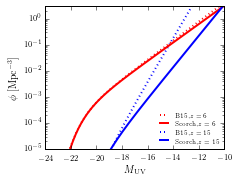

In [23]:
#GLF plots
direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'

inch_size = 246.0/72.0
fig = plt.figure(figsize=(1.0*inch_size, 1.25*inch_size*golden_mean))

ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)


params = load_params()
plt.rcParams.update(params)

def mag_to_lumin(mag):
    """Converts AB magnitude to luminosity."""
    conv_factor = 4.345e20
    return conv_factor*np.exp(-mag/2.5)
    
    #conv_factor = 4.487e20
    #return conv_factor*10**(-mag/2.5)


def GLF_Schecter(M,phi_star,M_star,alpha):
    L_star = mag_to_lumin(M_star)
    L = mag_to_lumin(M)
    #return phi*((L/L_star)**alpha)*np.exp(-L/L_star)
    
    x = 10.0**(0.4*(M_star - M))
    return 0.4*np.log(10)*phi_star*(x)**(1.0+alpha)*np.exp(-x)

M_list = np.linspace(-24.0,-10.0,200)
z=[6.0,  15.0]
#z=[15.0]

data_list = ['schecter_params_Bouwens.txt',
             #'schecter_params.txt',
             #'schecter_params_om=0.30_h0=0.70_sig8=0.80.txt',
             'schecter_params_om=0.30_h0=0.70_sig8=0.82.txt']

for name in data_list:
    data = np.loadtxt(direct+'schecter_params/'+ name)

    glf = map(lambda x: interp.interp1d(data[:,0], x), [y for y in data[:,1:].T])

    #schecter_list = np.array([[x(z0) for x in glf] for z0 in z])

    #for x in schecter_list:
    phi, M, alpha, MSF = [x(6.0) for x in glf]
    if 'Bouwens' in name:
        plot1, = ax1.plot(M_list,GLF_Schecter(M_list,phi,M,alpha),linewidth=2.0,color='r',linestyle='dotted')
    else:
        plot2, = ax1.plot(M_list,GLF_Schecter(M_list,phi,M,alpha),linewidth=2.0,color='r',linestyle='-')
        
    phi, M, alpha, MSF = [x(15.0) for x in glf]
    if 'Bouwens' in name:
        plot3, = ax1.plot(M_list,GLF_Schecter(M_list,phi,M,alpha),linewidth=2.0,color='b',linestyle='dotted')
    else:
        plot4, = ax1.plot(M_list,GLF_Schecter(M_list,phi,M,alpha),linewidth=2.0,color='b',linestyle='-')

        
ax1.set_yscale('log')

ax1.set_ylim([1e-5,3e0])
ax1.set_xlim([-24,-10])

ax1.set_ylabel(r'$\phi \; [\mathrm{Mpc}^{-3}]$')
ax1.set_xlabel(r'$M_\mathrm{UV}$')

legend2 = ax1.legend([plot1,plot2,plot3,plot4],
           [r'$\mathrm{B15,} z=6$', r'$\mathrm{Scorch,} z=6$',r'$\mathrm{B15,} z=15$',r'$\mathrm{Scorch,} z=15$'],
          loc='lower right',
          fontsize=6,
          ncol=1,
           numpoints=2,
          frameon=False)

plt.tight_layout()

save=True
if save:
    direct='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct+'GLF_compare.pdf')



In [ ]:
#Q volume and 21cm plots
direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'

inch_size = 246.0/72.0
fig = plt.figure(figsize=(2.0*inch_size, 1.75*inch_size*golden_mean))

ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(234)
ax3 = fig.add_subplot(232)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(233)
ax6 = fig.add_subplot(236)

params = load_params()
plt.rcParams.update(params)

data_Q = np.loadtxt(direct + 'chain_ngamma_planck16_Qvals.txt')
data_21cm = np.loadtxt(direct+ 'chain_ngamma_planck16_21cmvals.txt')
data_Q2 = np.loadtxt(direct + 'chain_polint_planck16_Scorch_xiion_Qvals.txt')
data_21cm2 = np.loadtxt(direct+ 'chain_polint_planck16_Scorch_xiion_21cmvals.txt')
data_Q3 = np.loadtxt(direct + 'chain_power_planck16_Scorch_xiion_Qvals.txt')
data_21cm3 = np.loadtxt(direct + 'chain_power_planck16_Scorch_xiion_21cmvals.txt')

def plotter(ax,dat,color):

    z_vals = dat[:,0]
    sig1_low = dat[:,2]
    sig1_high = dat[:,4]
    sig2_low = dat[:,1]
    sig2_high = dat[:,5]

    ax.fill_between(z_vals,sig1_low,sig1_high,color=color,alpha=0.75)
    ax.fill_between(z_vals,sig2_low,sig2_high,color=color,alpha=0.15)

plotter(ax1,data_Q,'b')
plotter(ax2,data_21cm,'g')
plotter(ax3,data_Q2,'b')
plotter(ax4,data_21cm2,'g')
plotter(ax5,data_Q3,'b')
plotter(ax6,data_21cm3,'g')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), visible=False)

ax1.set_ylabel(r'$Q_\mathrm{HII}$')
ax2.set_ylabel(r'$\delta T_b/\mathrm{mK}$')
ax2.set_xlabel(r'$z$')
ax4.set_xlabel(r'$z$')
ax6.set_xlabel(r'$z$')

ax1.set_title(r'${\rm Nonparametric\ }\dot n_\gamma {\rm ,\ GLF\ independent}$',fontsize=8)
ax3.set_title(r'${\rm Nonparametric\ }f_\mathrm{esc} {\rm ,\ Scorch\ GLF}$',fontsize=8)
ax3.set_title(r'${\rm Nonparametric\ }f_\mathrm{esc} {\rm ,\ Scorch\ GLF}$',fontsize=8)
ax5.set_title(r'${\rm Power\ law\ }f_\mathrm{esc} {\rm ,\ Scorch\ GLF}$',fontsize=8)

ax1.set_xlim([5,12])
ax2.set_xlim([5,12])
ax3.set_xlim([5,12])
ax4.set_xlim([5,12])
ax5.set_xlim([5,12])
ax6.set_xlim([5,12])

ax1.set_xticks([6,8,10,12])
ax2.set_xticks([6,8,10,12])
ax3.set_xticks([6,8,10,12])
ax4.set_xticks([6,8,10,12])
ax5.set_xticks([6,8,10,12])
ax6.set_xticks([6,8,10,12])

ax2.set_yticks([0,7,14,21,28])
ax4.set_yticks([0,7,14,21,28])
ax6.set_yticks([0,7,14,21,28])


plt.tight_layout()

plt.subplots_adjust(hspace=0.05,wspace=0.05)


save=True
if save:
    direct='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct+'Q_and_21cm.pdf')


In [ ]:
#dMSFdz plots for B15 model
direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'

inch_size = 246.0/72.0
fig = plt.figure(figsize=(1.0*inch_size, 2.0*inch_size*golden_mean))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


params = load_params()
plt.rcParams.update(params)

nbins=20

burnin=50000

data = np.loadtxt(direct + 'chain_power_planck16_Bouwens_xiion_dMSFdz.dat')
ax1.hist(data[-burnin:,-1],bins=nbins, alpha=0.5)

data = np.loadtxt(direct + 'chain_power_TTTEEE_Bouwens_tauonly_xiion_dMSFdz.dat')
ax1.hist(data[-burnin:,-1],bins=nbins, alpha=0.5)



In [ ]:
#Output ngamma and fesc, etc for best-fit values
z_list = np.linspace(6,15,10)

def schecter(z, fname):
    schect = np.loadtxt(fname)
    z_list = schect[:,0]
    phi_list = schect[:,1]
    M_list = schect[:,2]
    alpha_list = schect[:,3]
    MSF_list = schect[:,4]
    
    if z<np.min(z_list):
        return [phi_list[0],M_list[0],alpha_list[0],MSF_list[0]]
    elif z>np.max(z_list):
        return [phi_list[-1],M_list[-1],alpha_list[-1],MSF_list[-1]]
    else:
    
        funct = map( lambda x: interp.interp1d(z_list,x), [phi_list,M_list,alpha_list,MSF_list])
        return [fun(z) for fun in funct]
    
def schecter_Bouwens(z):
    return schecter(z, './schecter_params/schecter_params_Bouwens.txt')

def schecter_Scorch(z):
    return schecter(z, 'schecter_params_om=0.30_h0=0.70_sig8=0.82.txt')

print "params_ngamma_TTTEEE.py"
bestfit = np.array([  4.12646171, -18.93759088, -18.41955512, -19.01753012, -21.4755585, -18.80509756, -19.0543306,    4.18553261])
ngamma = 10.0**bestfit[1:7]
z_here = np.array([3.0,6.0,9.0,12.0,15.0,18.0])
ngamma_spline = interp.interp1d(z_here,ngamma,'linear')

print "----ngamma"
for z in z_list:
    print ngamma_spline(z)
    
    
print "params_polint_TTTEEE_Bouwens_xiion_dMSFdz.py"  
bestfit = [ 4.12646171e+00,   2.48438797e-02,   1.14463495e-01,   2.58849264e-01, 4.29869333e-01,   2.05273637e+00,   2.52573760e+01,  -4.07343687e-01]
z_here = np.array([3.0,6.0,9.0,12.0,15.0])
fesc = interp.interp1d(z_here, bestfit[1:6],'cubic')

print "----fesc"
for z in z_list:
    print np.max([np.min([fesc(z),1.0]),0.0])
    
def get_ngamma(z, fesc, schecter, logxiion, MSF, dMSF):
    phistar, Mstar, alphastar, MSF = schecter(z)
    L_star = mag_to_lumin(Mstar)
    L_faint = mag_to_lumin(MSF + dMSF*(z-6.0) )
    
    ngamma = fesc(z)
    ngamma *= (2.5/np.log(10.0))
    ngamma *= (10.0**logxiion)
    ngamma *= phistar*L_star
    ngamma *= float(mpm.gammainc(1.0+alphastar,L_faint/L_star))
    
    ngamma /= (3.086e24)**3
    
    return ngamma
    
print "----ngamma"
for z in z_list:
    logxiion = bestfit[-2]
    dMSF = bestfit[-1]
    MSF=-10.0
        
    print get_ngamma(z,fesc,schecter_Bouwens,logxiion,MSF,dMSF)
    
    
print "params_polint_TTTEEE_Bouwens_xiion_dMSFdz.py"  
bestfit = [ 4.12646171e+00,   2.48438797e-02,   1.14463495e-01,   2.58849264e-01, 4.29869333e-01,   2.05273637e+00,   2.52573760e+01,  -4.07343687e-01]
z_here = np.array([3.0,6.0,9.0,12.0,15.0])
fesc = interp.interp1d(z_here, bestfit[1:6],'cubic')

print "----fesc"
for z in z_list:
    print np.max([np.min([fesc(z),1.0]),0.0])
    
print "----ngamma"
for z in z_list:
    logxiion = bestfit[-2]
    dMSF = bestfit[-1]
    MSF=-10.0
        
    print get_ngamma(z,fesc,schecter_Scorch,logxiion,MSF,dMSF)





In [66]:
#BlueTides luminosity functions
import cPickle as pk

directory = '/Users/laynep/work/reionization/importance_sampler/python_implementation/BlueTides_data/'
files = ["BH_LF.pickle", 
         "LF-50-P2_Salpeter_corrected.pickle",
         "LF-50-M05_Salpeter_corrected.pickle",
         "LF-50-SED_bin_corrected.pickle"]

lum_func = pk.load(open(directory+files[0],'rb'))

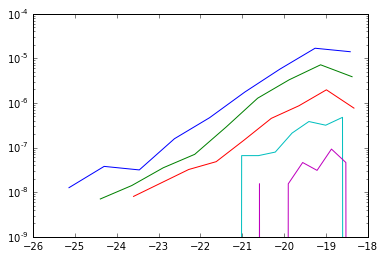

In [67]:
for x in xrange(len(lum_func)):
    plt.plot(lum_func[x][1][0],lum_func[x][1][1])
    
plt.yscale('log')
#plt.xlim([-27,-16])